# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [165]:
df = pd.read_csv("C:/Users/THEBEST/Desktop/Jupyter_workbook/sample/new.csv")
df.head()

,Customer_ID,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Monthly_Balance,Credit_Score
0,3392,1,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,Good,809.98,No,49.574949,312.494089,Good
1,3392,2,23,19114.12,1824.843333,3,4,3,4,3,4,11.27,Good,809.98,No,49.574949,284.629163,Good
2,3392,3,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,Good,809.98,No,49.574949,331.209863,Good
3,3392,4,23,19114.12,1824.843333,3,4,3,4,5,4,6.27,Good,809.98,No,49.574949,223.451310,Good
4,3392,5,23,19114.12,1824.843333,3,4,3,4,6,4,11.27,Good,809.98,No,49.574949,341.489231,Good


# EDA 

In [166]:
df.shape

(100000, 18)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Customer_ID             100000 non-null  int64  
 1   Month                   100000 non-null  int64  
 2   Age                     100000 non-null  int64  
 3   Annual_Income           100000 non-null  float64
 4   Monthly_Inhand_Salary   100000 non-null  float64
 5   Num_Bank_Accounts       100000 non-null  int64  
 6   Num_Credit_Card         100000 non-null  int64  
 7   Interest_Rate           100000 non-null  int64  
 8   Num_of_Loan             100000 non-null  int64  
 9   Delay_from_due_date     100000 non-null  int64  
 10  Num_of_Delayed_Payment  100000 non-null  int64  
 11  Changed_Credit_Limit    100000 non-null  float64
 12  Credit_Mix              100000 non-null  object 
 13  Outstanding_Debt        100000 non-null  float64
 14  Payment_of_Min_Amount

In [168]:
df.isna().sum()

Customer_ID               0
Month                     0
Age                       0
Annual_Income             0
Monthly_Inhand_Salary     0
Num_Bank_Accounts         0
Num_Credit_Card           0
Interest_Rate             0
Num_of_Loan               0
Delay_from_due_date       0
Num_of_Delayed_Payment    0
Changed_Credit_Limit      0
Credit_Mix                0
Outstanding_Debt          0
Payment_of_Min_Amount     0
Total_EMI_per_month       0
Monthly_Balance           0
Credit_Score              0
dtype: int64

We can see that there is no missing values in any of the columns. Hence, there is no problem with null values in the entire dataset.

In [169]:
df.duplicated().sum()

0

In [170]:
# define numerical value as "numeric"
numeric = df.loc[:, (df.dtypes != 'object')].columns.tolist()
numeric

['Customer_ID',
 'Month',
 'Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Outstanding_Debt',
 'Total_EMI_per_month',
 'Monthly_Balance']

In [171]:
# define categorical data as 'categoric'
categoric = df.loc[:, (df.dtypes != 'int64') & (df.dtypes != 'float64')].columns.tolist()
categoric

['Credit_Mix', 'Payment_of_Min_Amount', 'Credit_Score']

In [172]:
# Analyzing statistical summary (numerical data)
df.describe()

,Customer_ID,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,25982.666640,4.500000,33.316340,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,1426.220376,107.699208,392.697586
std,14340.543051,2.291299,10.764812,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,1155.129026,132.267056,201.652719
min,1006.000000,1.000000,14.000000,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.230000,0.000000,0.007760
25%,13664.500000,2.750000,24.000000,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,566.072500,29.268886,267.615983
50%,25777.000000,4.500000,33.000000,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,1166.155000,66.462304,333.865366
75%,38385.000000,6.250000,42.000000,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,1945.962500,147.392573,463.215683
max,50999.000000,8.000000,56.000000,179987.280000,15204.633330,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,4998.070000,1779.103254,1183.930696


In [173]:
# dropping CUST_ID, Month column because it is not used
df.drop(columns=["Customer_ID", "Month"],axis=1,inplace=True)

In [174]:
df.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Credit_Mix', 'Outstanding_Debt', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Monthly_Balance', 'Credit_Score'],
      dtype='object')

# Univariate Analysis

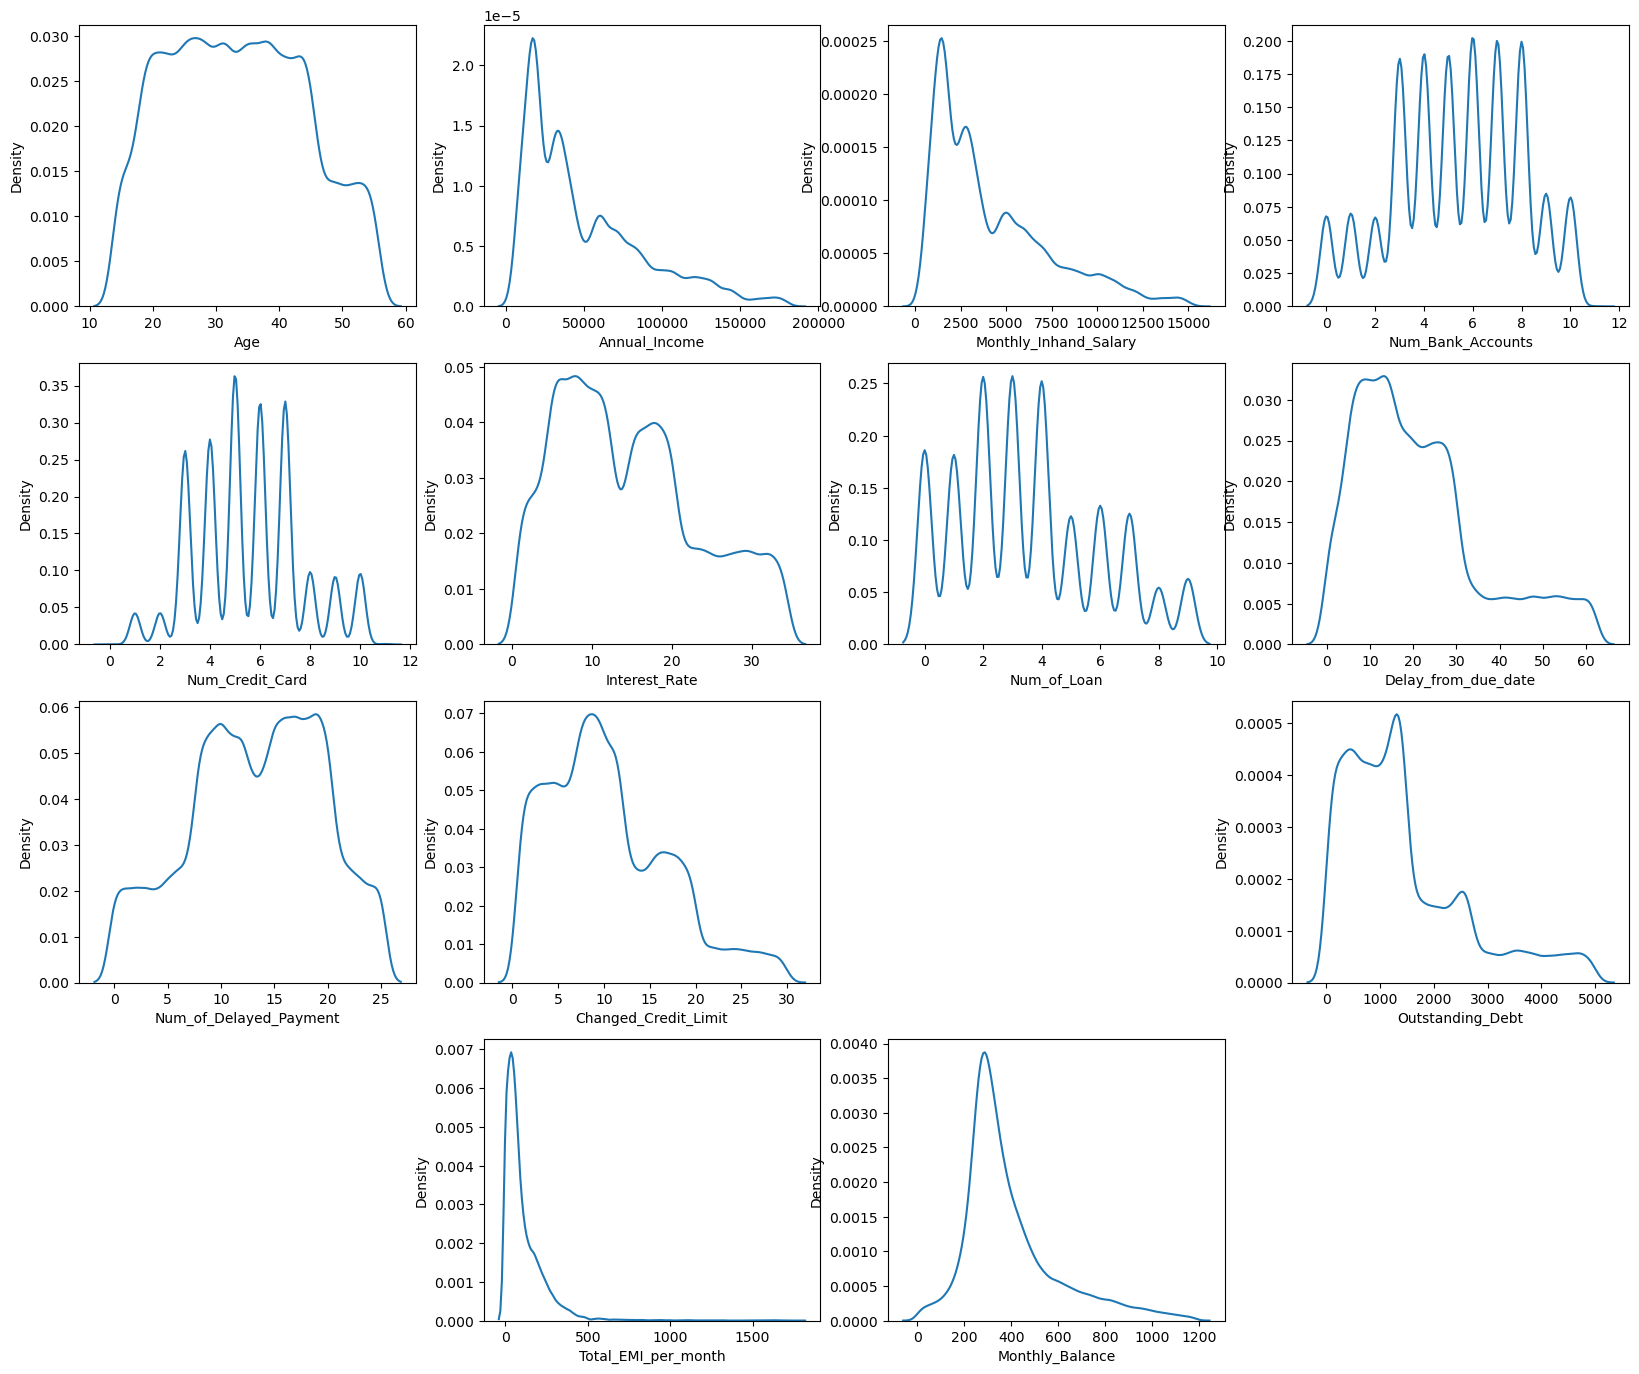

In [175]:
plt.figure(figsize=(20, 30))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(7, 4, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)    
plt.show()

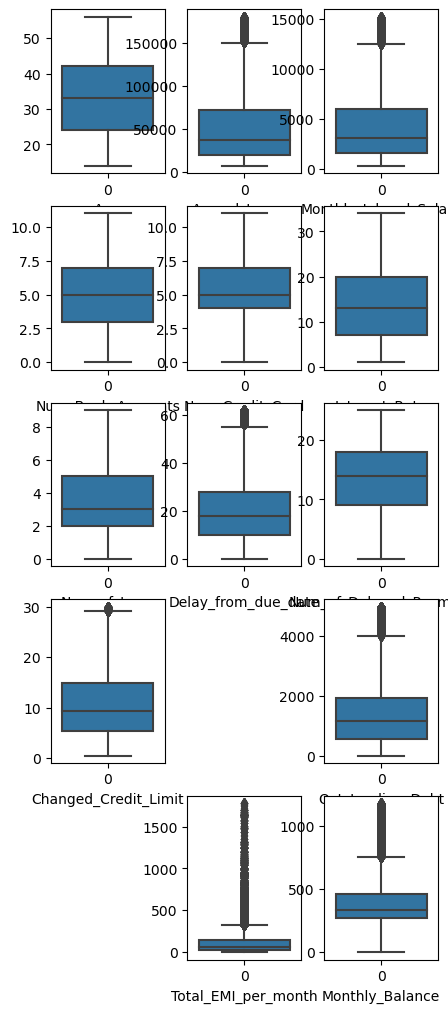

In [176]:
# Plotting boxplot for numerical data 
plt.figure(figsize=(5, 20))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(8, 3, i+1)
        sns.boxplot(df[col], ax=ax)
        plt.xlabel(col)    
plt.show()

# Multivariate Anlysis

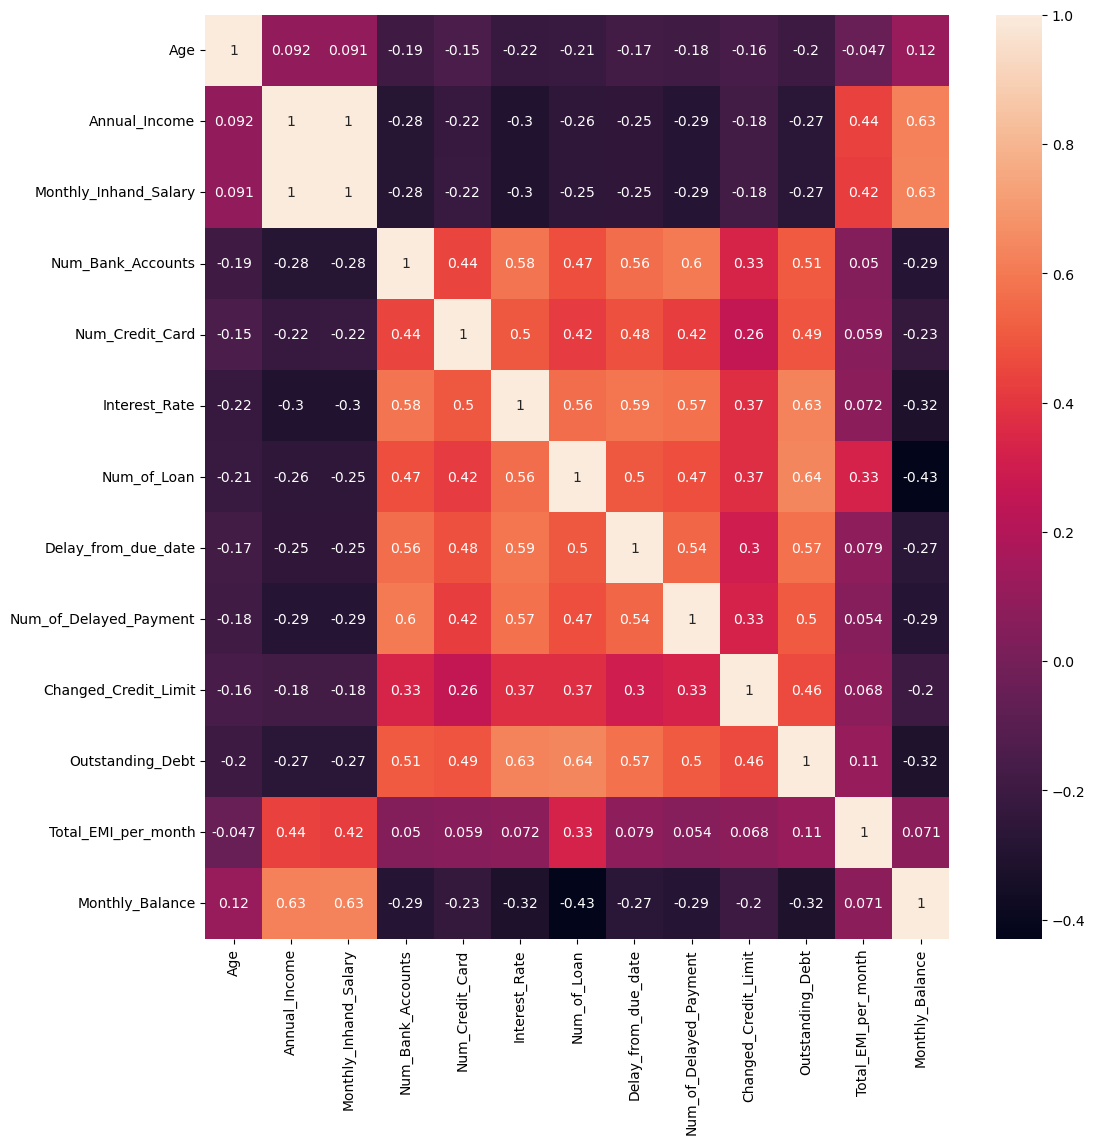

In [177]:
# plotting heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()


In [178]:
unique_Credit_Mix = df['Credit_Mix'].unique()

# Display unique values
print(unique_Credit_Mix)

['Good' 'Standard' 'Bad']


In [179]:
df["Credit_Mix"] = df["Credit_Mix"].map({"Standard": 1, 
                               "Good": 2, 
                               "Bad": 0})

In [180]:
df["Payment_of_Min_Amount"] = df["Payment_of_Min_Amount"].map({"NM": 1, 
                               "Yes": 2, 
                               "No": 0})

In [181]:
df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Monthly_Balance,Credit_Score
0,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,2,809.98,0,49.574949,312.494089,Good
1,23,19114.12,1824.843333,3,4,3,4,3,4,11.27,2,809.98,0,49.574949,284.629163,Good
2,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,2,809.98,0,49.574949,331.209863,Good
3,23,19114.12,1824.843333,3,4,3,4,5,4,6.27,2,809.98,0,49.574949,223.451310,Good
4,23,19114.12,1824.843333,3,4,3,4,6,4,11.27,2,809.98,0,49.574949,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.99,3359.415833,4,6,7,2,23,7,11.50,2,502.38,0,35.104023,479.866228,Poor
99996,25,39628.99,3359.415833,4,6,7,2,18,7,11.50,2,502.38,0,35.104023,496.651610,Poor
99997,25,39628.99,3359.415833,4,6,7,2,27,6,11.50,2,502.38,0,35.104023,516.809083,Poor
99998,25,39628.99,3359.415833,4,6,7,2,20,6,11.50,2,502.38,0,35.104023,319.164979,Standard


In [182]:
df["Credit_Score"].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

<Axes: title={'center': 'Credit Scores Based on Num_Bank_Accounts'}, xlabel='Num_Bank_Accounts'>

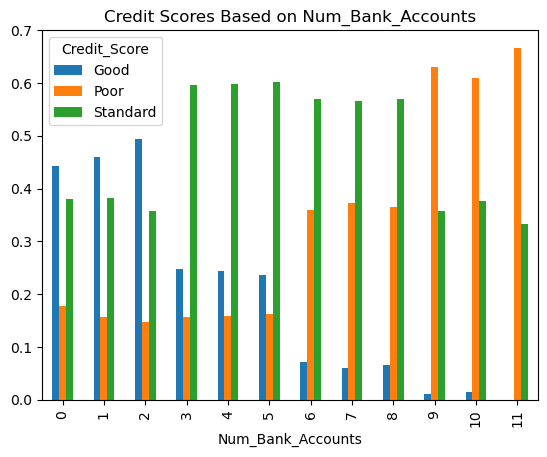

In [183]:
pd.crosstab(df['Num_Bank_Accounts'],df['Credit_Score'],normalize='index').plot.bar(title="Credit Scores Based on Num_Bank_Accounts")


[Text(0.5, 1.0, 'Credit Scores Based on Annual Income')]

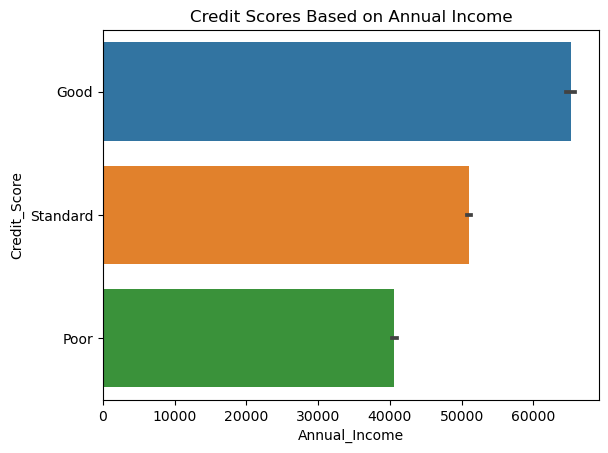

In [184]:
sns.barplot(x='Annual_Income', y='Credit_Score',data=df).set(title="Credit Scores Based on Annual Income")


[Text(0.5, 1.0, 'Credit Scores Based on Monthly Balance')]

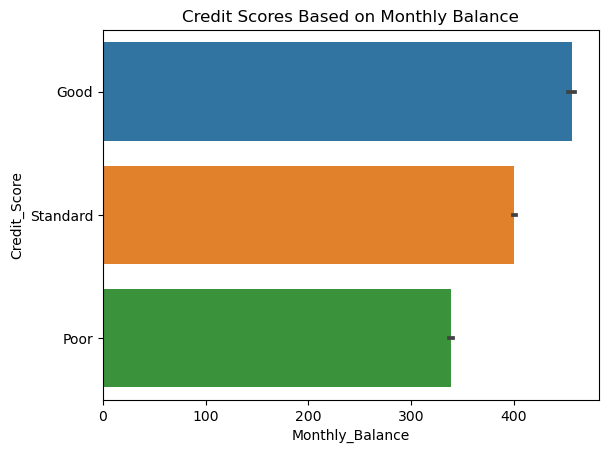

In [185]:

sns.barplot(x='Monthly_Balance', y='Credit_Score', data=df).set(title="Credit Scores Based on Monthly Balance")


In [186]:
df["Credit_Score"].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [188]:
#df["Credit_Score"] = df["Credit_Score"].map({"Standard": 2, 
 #                              "Good": 1, 
  #                             "Poor": 0})

In [189]:
df1 = df.drop(columns=['Credit_Score'])
df1

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Monthly_Balance
0,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,2,809.98,0,49.574949,312.494089
1,23,19114.12,1824.843333,3,4,3,4,3,4,11.27,2,809.98,0,49.574949,284.629163
2,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,2,809.98,0,49.574949,331.209863
3,23,19114.12,1824.843333,3,4,3,4,5,4,6.27,2,809.98,0,49.574949,223.451310
4,23,19114.12,1824.843333,3,4,3,4,6,4,11.27,2,809.98,0,49.574949,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.99,3359.415833,4,6,7,2,23,7,11.50,2,502.38,0,35.104023,479.866228
99996,25,39628.99,3359.415833,4,6,7,2,18,7,11.50,2,502.38,0,35.104023,496.651610
99997,25,39628.99,3359.415833,4,6,7,2,27,6,11.50,2,502.38,0,35.104023,516.809083
99998,25,39628.99,3359.415833,4,6,7,2,20,6,11.50,2,502.38,0,35.104023,319.164979


# Scaling the DataFrame

In [39]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scaled_df = scalar.fit_transform(df1)


# Dimensionality reduction

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,1.918867,-1.829180
1,2.032045,-1.910784
2,1.938557,-1.799272
3,2.086832,-2.059308
4,2.033113,-1.798331
...,...,...
99995,1.750558,-0.915665
99996,1.866135,-0.924826
99997,1.758587,-0.840201
99998,1.687741,-1.206417


# Hyperparameter tuning
Finding 'k' value by Elbow Method

In [42]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

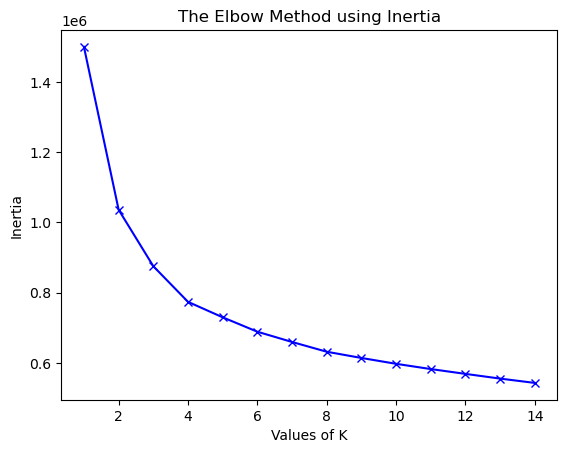

In [43]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

# Model Building using KMeans

In [44]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'Group':kmeans_model.labels_})],axis=1)

# Visualizing the clustered dataframe

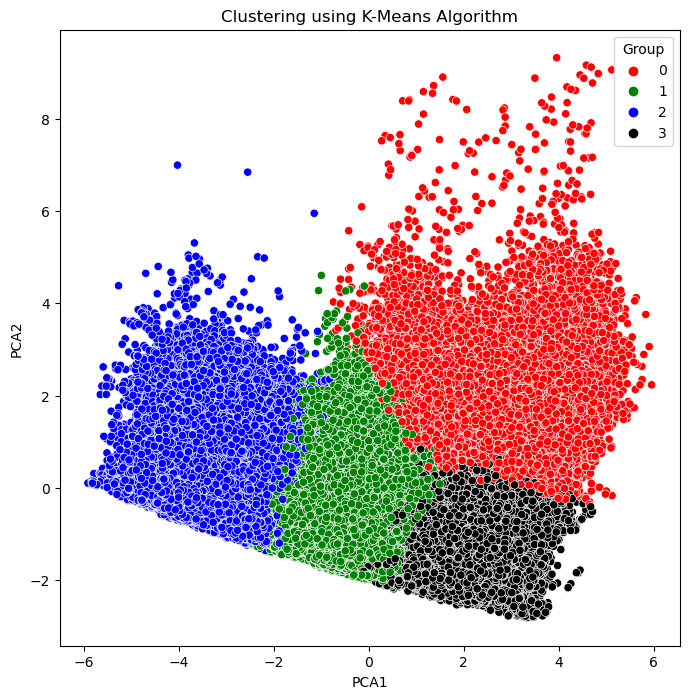

In [45]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="Group",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [47]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df1.columns])
# inverse transform the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df1.columns])
cluster_centers

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Monthly_Balance
0,35.970564,115257.046945,9572.482267,3.727333,4.545005,8.614916,2.116151,12.888132,9.334066,7.578806,1.624252,740.247366,0.507057,186.152172,675.899905
1,31.510576,38149.620710,3174.201861,5.609965,5.200693,14.800165,3.286421,18.064874,14.214156,12.460290,0.986042,1099.904965,1.797492,82.804417,345.011503
2,29.683048,32916.748293,2736.578221,7.956454,7.561439,24.726632,6.232471,38.699765,19.248069,14.122602,0.131647,2896.571003,1.879585,134.759810,281.516256
3,37.519423,37004.762990,3074.087849,3.474541,4.470004,7.500749,1.949852,11.702110,8.699275,6.195534,1.767327,736.624419,0.104589,51.017131,363.040040


In [48]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([df1,pd.DataFrame({'Group':kmeans_model.labels_})],axis=1)
cluster_df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Monthly_Balance,Group
0,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,2,809.98,0,49.574949,312.494089,3
1,23,19114.12,1824.843333,3,4,3,4,3,4,11.27,2,809.98,0,49.574949,284.629163,3
2,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,2,809.98,0,49.574949,331.209863,3
3,23,19114.12,1824.843333,3,4,3,4,5,4,6.27,2,809.98,0,49.574949,223.451310,3
4,23,19114.12,1824.843333,3,4,3,4,6,4,11.27,2,809.98,0,49.574949,341.489231,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.99,3359.415833,4,6,7,2,23,7,11.50,2,502.38,0,35.104023,479.866228,3
99996,25,39628.99,3359.415833,4,6,7,2,18,7,11.50,2,502.38,0,35.104023,496.651610,3
99997,25,39628.99,3359.415833,4,6,7,2,27,6,11.50,2,502.38,0,35.104023,516.809083,3
99998,25,39628.99,3359.415833,4,6,7,2,20,6,11.50,2,502.38,0,35.104023,319.164979,3


In [49]:
cluster_df['Group'] = cluster_df['Group'].replace(to_replace=0, value='Group_A')

In [50]:
cluster_df['Group'] = cluster_df['Group'].replace(to_replace=1, value='Group_B')

In [51]:
cluster_df['Group'] = cluster_df['Group'].replace(to_replace=2, value='Group_C')

In [52]:
cluster_df['Group'] = cluster_df['Group'].replace(to_replace=3, value='Group_D')

In [53]:
cluster_df['Group']

0        Group_D
1        Group_D
2        Group_D
3        Group_D
4        Group_D
          ...   
99995    Group_D
99996    Group_D
99997    Group_D
99998    Group_D
99999    Group_D
Name: Group, Length: 100000, dtype: object

In [54]:
cluster_df.tail(10)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Monthly_Balance,Group
99990,28,20002.88,1929.906667,10,8,29,5,33,25,18.31,0,3571.70,2,60.964772,228.750392,Group_C
99991,29,20002.88,1929.906667,10,8,29,5,33,25,18.31,0,3571.70,2,60.964772,337.362988,Group_C
99992,24,39628.99,3359.415833,4,6,7,2,23,6,9.50,2,502.38,0,35.104023,189.641080,Group_D
99993,25,39628.99,3359.415833,4,6,7,2,23,6,11.50,2,502.38,0,35.104023,400.104466,Group_D
99994,25,39628.99,3359.415833,4,6,7,2,20,6,9.50,2,502.38,0,35.104023,410.256158,Group_D
99995,25,39628.99,3359.415833,4,6,7,2,23,7,11.50,2,502.38,0,35.104023,479.866228,Group_D
99996,25,39628.99,3359.415833,4,6,7,2,18,7,11.50,2,502.38,0,35.104023,496.651610,Group_D
99997,25,39628.99,3359.415833,4,6,7,2,27,6,11.50,2,502.38,0,35.104023,516.809083,Group_D
99998,25,39628.99,3359.415833,4,6,7,2,20,6,11.50,2,502.38,0,35.104023,319.164979,Group_D
99999,25,39628.99,3359.415833,4,6,7,2,18,6,11.50,2,502.38,0,35.104023,393.673696,Group_D


In [55]:
cluster_1_df = cluster_df[cluster_df["Group"]==0]
cluster_1_df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Monthly_Balance,Group


In [56]:
cluster_2_df = cluster_df[cluster_df["Group"]==1]
cluster_2_df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Monthly_Balance,Group


In [57]:
cluster_3_df = cluster_df[cluster_df["Group"]==2]
cluster_3_df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Monthly_Balance,Group


In [58]:
cluster_4_df = cluster_df[cluster_df["Group"] == 3]
cluster_4_df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Monthly_Balance,Group


<Axes: xlabel='Group', ylabel='count'>

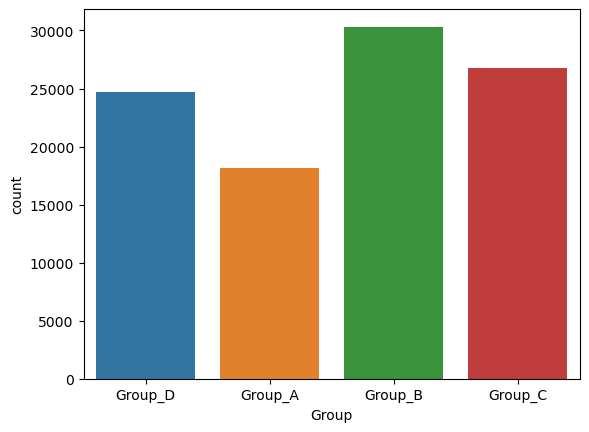

In [59]:
#Visualization
sns.countplot(x='Group', data=cluster_df)

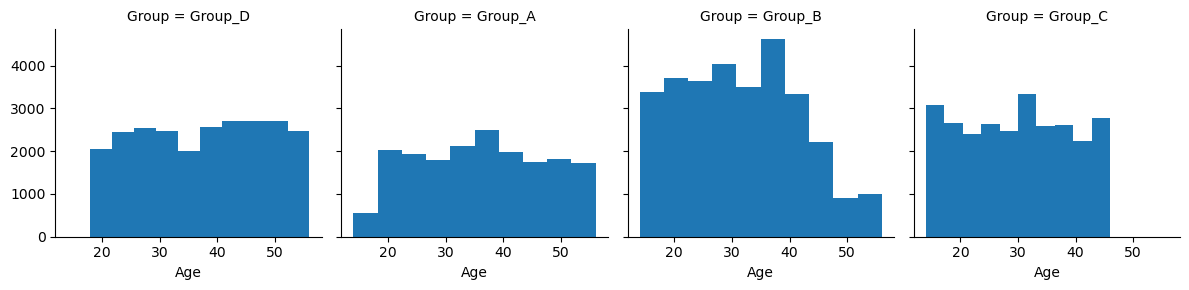

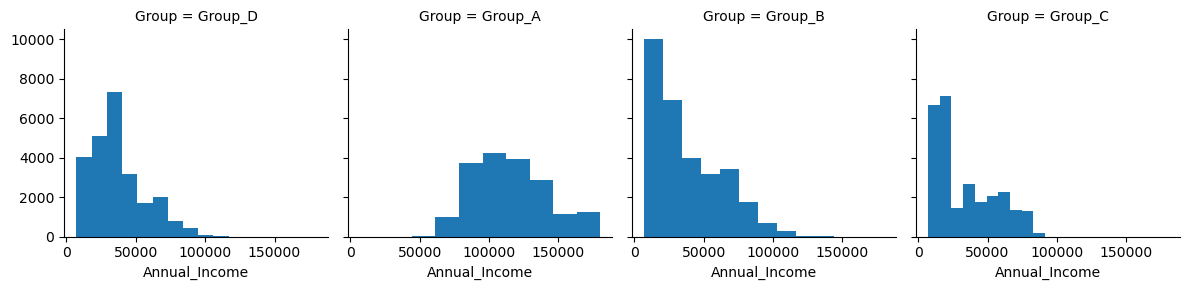

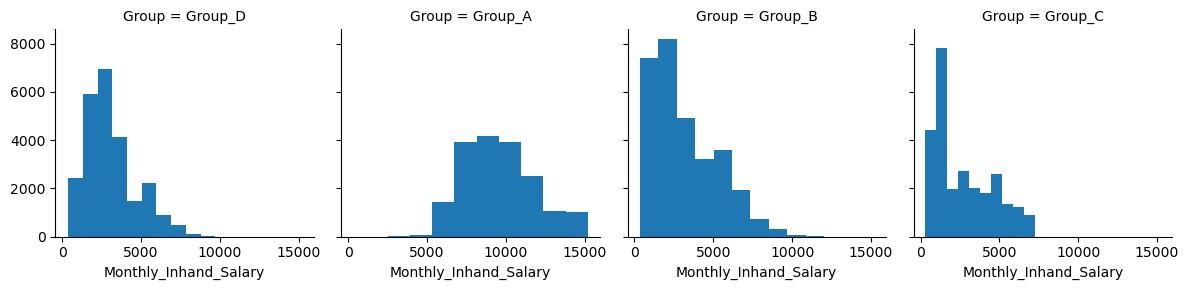

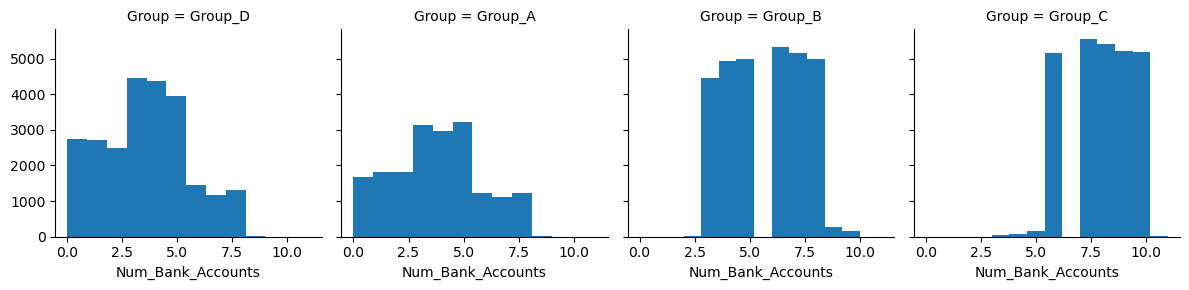

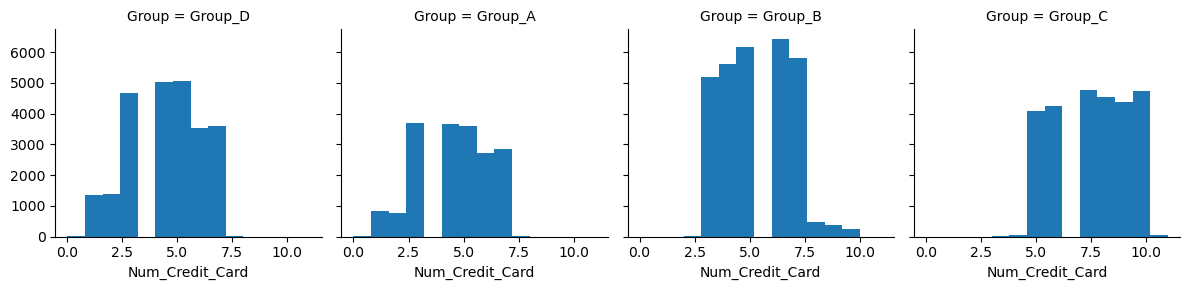

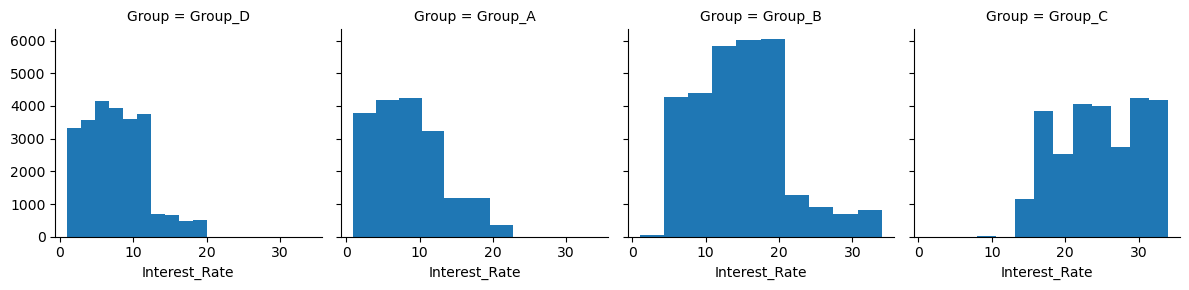

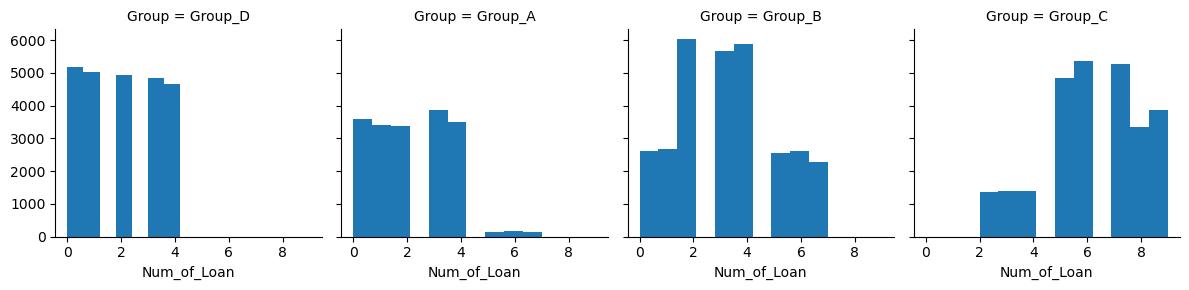

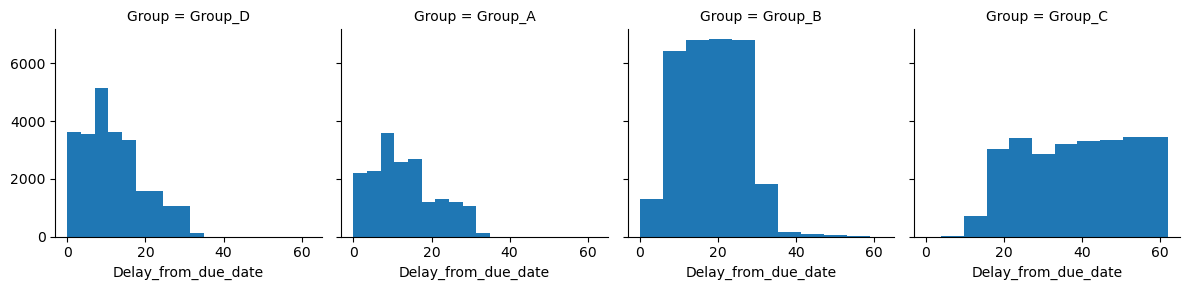

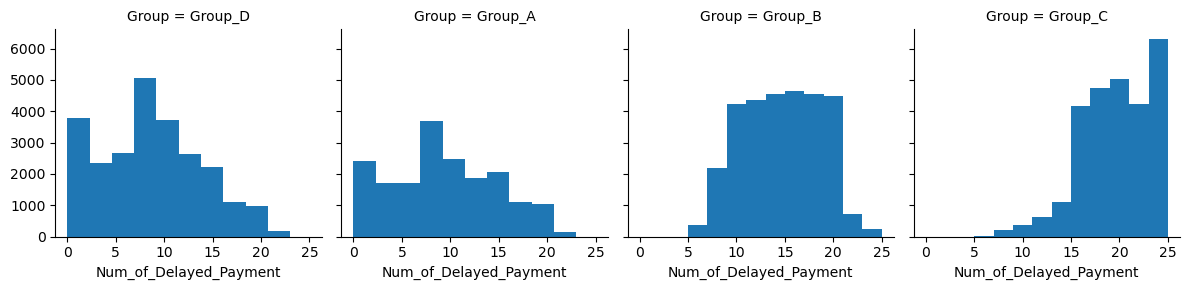

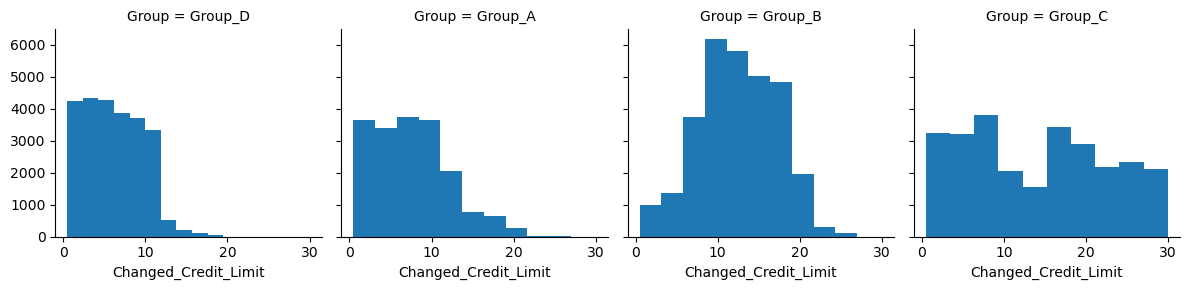

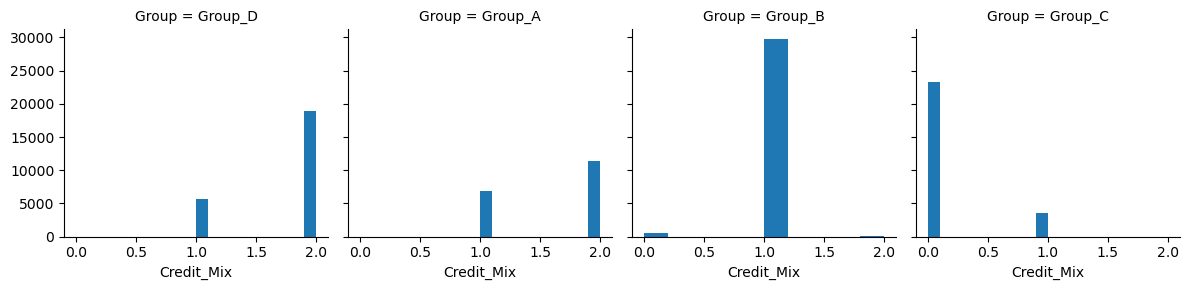

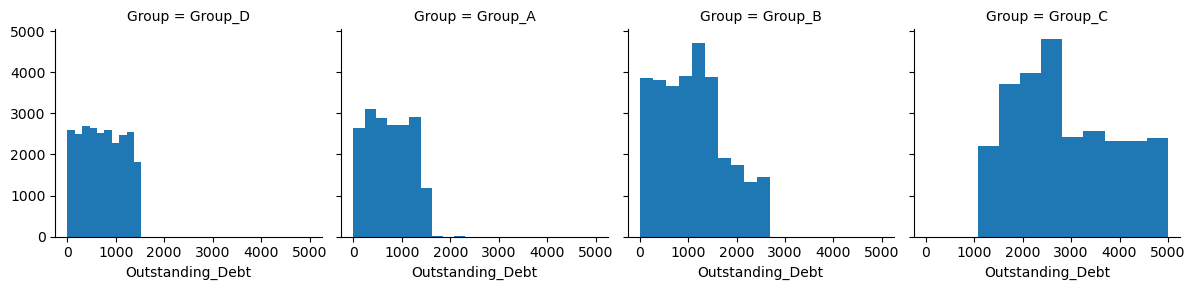

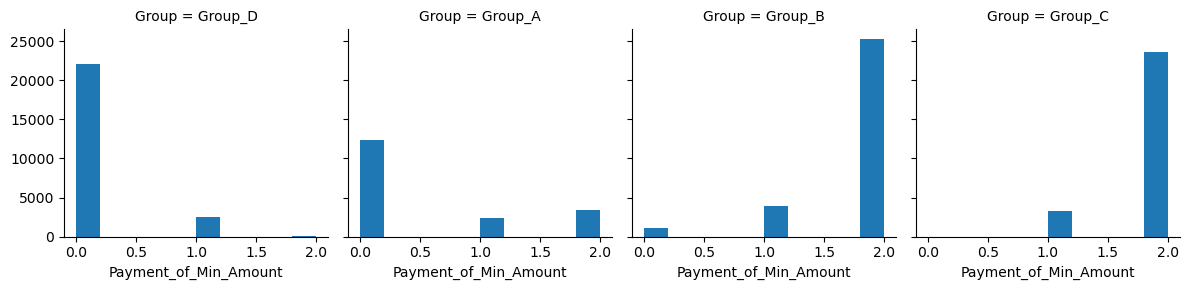

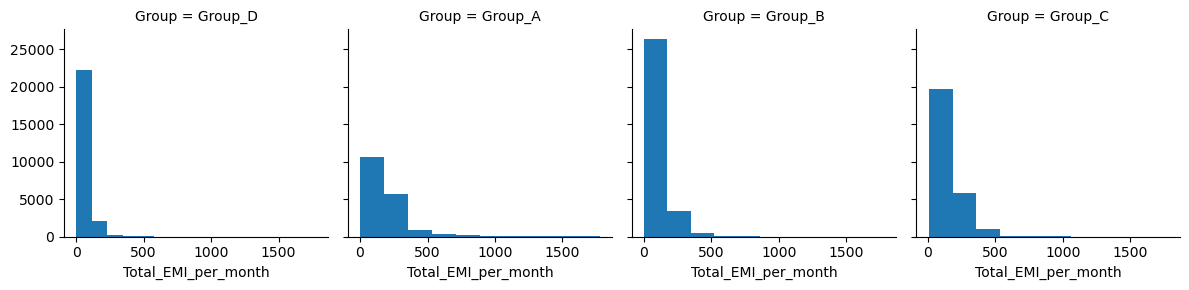

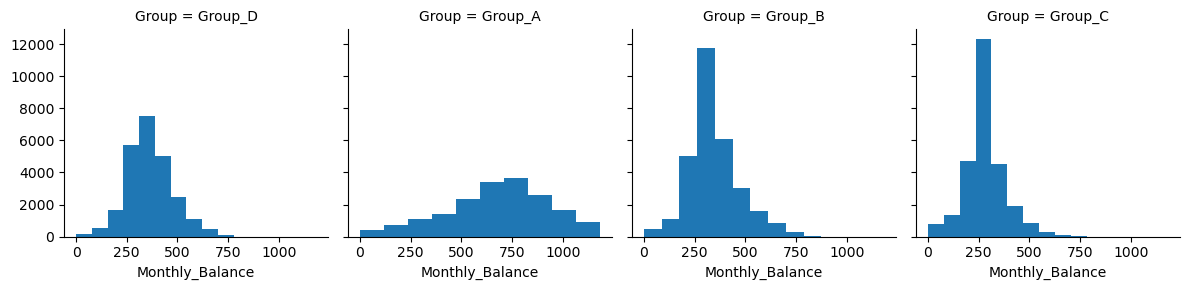

In [60]:
for c in cluster_df.drop(['Group'],axis=1):
    grid= sns.FacetGrid(cluster_df, col='Group')
    grid= grid.map(plt.hist, c)
plt.show()

# Saving the kmeans clustering model and the data with cluster label

In [61]:
#Saving Scikitlearn models
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [62]:
cluster_df.to_csv("Clustered_Customer_Data.csv")

# Training and Testing the model accuracy using decision tree

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
#Split Dataset
X = cluster_df.drop(['Group'],axis=1)
y= cluster_df[['Group']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

In [92]:
X_train

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Monthly_Balance
5726,27,97003.11,8101.592500,8,7,5,4,28,10,8.11,1,802.47,2,164.355851,491.096550
6982,24,36496.38,2934.365000,8,3,30,3,16,18,12.46,1,1328.69,2,45.812349,314.006424
92188,34,31155.48,2527.290000,7,4,21,5,25,18,12.48,1,2598.30,2,76.918612,361.295836
921,29,147499.60,12353.633330,2,2,12,2,14,3,8.21,2,1250.67,0,192.206483,685.024247
6784,45,131890.95,10709.912500,1,3,7,4,15,9,7.34,2,244.18,0,320.676001,796.417272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54575,29,8453.49,977.457500,9,7,18,5,32,17,1.52,0,2314.96,2,29.236416,317.025676
24679,28,34132.87,2970.405833,4,6,4,4,7,13,10.89,2,187.64,0,100.084318,108.210050
18095,22,9388.27,978.355833,4,4,32,4,5,19,8.73,1,2673.96,2,18.494964,307.355932
50542,18,67104.12,5829.010000,9,9,19,5,26,22,21.54,0,4635.75,2,265.022160,320.005526


In [93]:
X_test

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Monthly_Balance
68471,24,58211.85,4727.987500,8,6,5,4,15,17,3.65,2,901.00,0,152.727498,323.182739
66249,40,43016.70,3853.725000,7,7,27,6,60,11,18.66,1,2136.77,2,131.248954,171.773079
32019,33,16114.17,1160.847500,3,6,13,2,26,13,16.99,1,1246.74,2,25.779887,304.908500
66827,33,17640.42,1380.035000,7,5,31,7,25,14,26.55,0,4698.82,2,80.612864,290.379819
22841,41,152148.92,12888.076670,1,3,9,0,3,4,2.45,2,1039.82,0,0.000000,1012.670631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23010,16,89507.07,7199.922500,4,6,8,5,14,17,13.16,1,240.40,2,250.951429,655.046778
84109,19,19135.06,1662.588333,6,6,29,8,42,21,27.43,0,4188.88,2,95.287290,262.412497
92728,19,64933.76,5368.146667,3,3,33,4,15,22,19.04,1,2699.17,1,193.692582,361.121267
24819,39,58267.23,4943.602500,8,6,17,4,23,9,17.98,1,1896.36,1,109.720351,479.275752


In [94]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logr_liblinear = LogisticRegression(verbose=1,solver='liblinear')

In [95]:
logr_liblinear.fit(X_train,y_train)

[LibLinear]

LogisticRegression(solver='liblinear', verbose=1)

In [96]:
logr_liblinear.score(X_train,y_train)

0.8361428571428572

In [97]:
Y_pred_log=logr_liblinear.predict(X_test)

In [98]:
Y_pred_log1=logr_liblinear.predict(X_train)

In [99]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
confusion_matrix(y_test,Y_pred_log)

array([[5175,  158,    6,  128],
       [ 239, 6824, 1203,  912],
       [   0,  473, 7504,   11],
       [ 464, 1214,   49, 5640]], dtype=int64)

In [100]:
print ("Accuracy : ", accuracy_score(y_test, Y_pred_log))

Accuracy :  0.8381


In [101]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,Y_pred_log))

              precision    recall  f1-score   support

     Group_A       0.88      0.95      0.91      5467
     Group_B       0.79      0.74      0.76      9178
     Group_C       0.86      0.94      0.90      7988
     Group_D       0.84      0.77      0.80      7367

    accuracy                           0.84     30000
   macro avg       0.84      0.85      0.84     30000
weighted avg       0.84      0.84      0.84     30000



In [ ]:
#Random Forest alogithm to predict credit score

In [190]:
from sklearn.model_selection import train_test_split
x = np.array(df[["Age", "Annual_Income", "Monthly_Inhand_Salary", 
                   "Num_Bank_Accounts", "Num_Credit_Card", 
                   "Interest_Rate", "Num_of_Loan", 
                   "Delay_from_due_date", "Num_of_Delayed_Payment","Changed_Credit_Limit",
                   "Credit_Mix", "Outstanding_Debt", "Payment_of_Min_Amount", "Total_EMI_per_month",
                   "Monthly_Balance"]])
Y = np.array(df[["Credit_Score"]])

In [191]:
x_train, x_test, Y_train, Y_test =train_test_split(x, Y, test_size=0.33,random_state=42)
 
                                                  
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train,Y_train)

RandomForestClassifier()

In [192]:
print("Credit Score Prediction : ")
a = float(input("Age: "))
b = float(input("Annual_Income: "))
c = float(input("Monthly Inhand Salary: "))
d = float(input("Number of Bank Accounts: "))
e = float(input("Number of Credit cards: "))
f = float(input("Interest rate: "))
g = float(input("Number of Loan: "))
h = float(input("Average number of days delayed by the person: "))
i = float(input("Number of delayed payments: "))
j = float(input("Changed_Credit_Limit: "))
k = input("Credit Mix (Bad: 0, Standard: 1, Good: 2) : ")
l = float(input("Outstanding Debt: "))
m = float(input("Payment_of_Min_Amount: "))
n = float(input("Total_EMI_per_month: "))
o = float(input("Monthly Balance: "))

features = np.array([[a, b, c, d, e, f, g, h, i, j, k, l,m,n,o]])
print("Predicted Credit Score = ", clf.predict(features))

Credit Score Prediction : 
Age: 40
Annual_Income: 25000
Monthly Inhand Salary: 2000
Number of Bank Accounts: 5
Number of Credit cards: 5
Interest rate: 29
Number of Loan: 3
Average number of days delayed by the person: 15
Number of delayed payments: 16
Changed_Credit_Limit: 3.2
Credit Mix (Bad: 0, Standard: 1, Good: 2) : 2
Outstanding Debt: 0
Payment_of_Min_Amount: 2
Total_EMI_per_month: 55
Monthly Balance: 326
Predicted Credit Score =  ['Poor']


In [193]:
import joblib

In [194]:
joblib.dump(clf, 'credit_score_model.pkl')

['credit_score_model.pkl']

In [195]:
clf.score(x_train,Y_train)

0.9994029850746269

In [196]:
y_pred_rf = clf.predict(x_test)

In [197]:
print ("Accuracy : ", accuracy_score(Y_test, y_pred_rf))

Accuracy :  0.7931212121212121


In [198]:
y_pred_rf1 = clf.predict(x_train)

In [199]:
print(clf)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(Y_train, y_pred_rf1))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(Y_test, y_pred_rf))

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(Y_test, y_pred_rf))

RandomForestClassifier()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00     11962
        Poor       1.00      1.00      1.00     19365
    Standard       1.00      1.00      1.00     35673

    accuracy                           1.00     67000
   macro avg       1.00      1.00      1.00     67000
weighted avg       1.00      1.00      1.00     67000

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

        Good       0.75      0.75      0.75      5866
        Poor       0.78      0.81      0.80      9633
    Standard       0.81      0.80      0.80     17501

    accuracy                           0.79     33000
   macro avg       0.78      0.79      0.78     33000
weighted avg       0.79      0.79      0.79     33000

Confusion matrix
-------------------------------------------------

In [ ]:
!pip install lightgbm

In [119]:
import lightgbm as lgb
light = lgb.LGBMClassifier()
light.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015939 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1738
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 15
[LightGBM] [Info] Start training from score -1.704848
[LightGBM] [Info] Start training from score -1.197092
[LightGBM] [Info] Start training from score -1.313735
[LightGBM] [Info] Start training from score -1.397095


LGBMClassifier()

In [120]:
lgb_pred=light.predict(X_test)

In [121]:
light.score(X_train,y_train)

0.9995142857142857

In [122]:
print ("Accuracy : ", accuracy_score(y_test, lgb_pred))

Accuracy :  0.9894666666666667


In [123]:
confusion_matrix(y_test, lgb_pred)

array([[5382,   52,    0,   33],
       [  52, 9059,   25,   42],
       [   0,   41, 7947,    0],
       [  31,   40,    0, 7296]], dtype=int64)

In [124]:
print(classification_report(y_test, lgb_pred))

              precision    recall  f1-score   support

     Group_A       0.98      0.98      0.98      5467
     Group_B       0.99      0.99      0.99      9178
     Group_C       1.00      0.99      1.00      7988
     Group_D       0.99      0.99      0.99      7367

    accuracy                           0.99     30000
   macro avg       0.99      0.99      0.99     30000
weighted avg       0.99      0.99      0.99     30000



In [128]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, KFold

In [129]:
lgb_tuned =LGBMClassifier(random_state=3,n_jobs=-1)

params = {'n_estimators':np.arange(80,120)}

gscv = GridSearchCV(lgb_tuned,param_grid=params,cv=3,scoring='f1',n_jobs=-1,verbose=True)
gscv.fit(X_train,y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1738
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 15
[LightGBM] [Info] Start training from score -1.704848
[LightGBM] [Info] Start training from score -1.197092
[LightGBM] [Info] Start training from score -1.313735
[LightGBM] [Info] Start training from score -1.397095


GridSearchCV(cv=3, estimator=LGBMClassifier(n_jobs=-1, random_state=3),
             n_jobs=-1,
             param_grid={'n_estimators': array([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119])},
             scoring='f1', verbose=True)

In [130]:
gscv.best_params_

{'n_estimators': 80}

In [131]:
lgb_tuned = LGBMClassifier(random_state=3,n_jobs=-1,n_estimators=80)


In [132]:
lgb_tuned.fit(X_train,y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017563 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1738
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 15
[LightGBM] [Info] Start training from score -1.704848
[LightGBM] [Info] Start training from score -1.197092
[LightGBM] [Info] Start training from score -1.313735
[LightGBM] [Info] Start training from score -1.397095


LGBMClassifier(n_estimators=80, n_jobs=-1, random_state=3)

In [133]:
lgb_tuned.score(X_train,y_train)


0.9986

In [134]:
lgb_pred1=lgb_tuned.predict(X_test)


In [135]:
lgb_pred_train=lgb_tuned.predict(X_train)


In [136]:
print ("Accuracy : ", accuracy_score(y_test, lgb_pred1))


Accuracy :  0.9889


In [137]:
confusion_matrix(y_test, lgb_pred1)


array([[5375,   56,    0,   36],
       [  52, 9055,   24,   47],
       [   0,   45, 7943,    0],
       [  33,   40,    0, 7294]], dtype=int64)

In [138]:
from sklearn.metrics import classification_report


In [139]:
print(lgb_tuned)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, lgb_pred_train))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, lgb_pred1))

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, lgb_pred1))

LGBMClassifier(n_estimators=80, n_jobs=-1, random_state=3)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

     Group_A       1.00      1.00      1.00     12726
     Group_B       1.00      1.00      1.00     21145
     Group_C       1.00      1.00      1.00     18817
     Group_D       1.00      1.00      1.00     17312

    accuracy                           1.00     70000
   macro avg       1.00      1.00      1.00     70000
weighted avg       1.00      1.00      1.00     70000

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

     Group_A       0.98      0.98      0.98      5467
     Group_B       0.98      0.99      0.99      9178
     Group_C       1.00      0.99      1.00      7988
     Group_D       0.99      0.99      0.99      7367

    accuracy                           0.99     30000
   macro avg       0.99      0.99

In [140]:
#Decision_Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import metrics
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [141]:
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9773


In [142]:
#Confusion_Matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5289  108    0   70]
 [ 130 8898   48  102]
 [   2   77 7909    0]
 [  70   74    0 7223]]
              precision    recall  f1-score   support

     Group_A       0.96      0.97      0.97      5467
     Group_B       0.97      0.97      0.97      9178
     Group_C       0.99      0.99      0.99      7988
     Group_D       0.98      0.98      0.98      7367

    accuracy                           0.98     30000
   macro avg       0.98      0.98      0.98     30000
weighted avg       0.98      0.98      0.98     30000



In [143]:
dc_tuned =DecisionTreeClassifier()

params = {"criterion":['gini','entropy'],
         "max_depth":range(1,10),
         "min_samples_split":range(1,10),
         "min_samples_leaf":range(1,5)}

dscv = GridSearchCV(dc_tuned,param_grid=params,cv=10,n_jobs=-1,verbose=1)
dscv.fit(X_train,y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [144]:
dscv.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [145]:
dscv_tuned = DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_leaf=3,min_samples_split=3)


In [146]:
dscv_tuned.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3,
                       min_samples_split=3)

In [147]:
dscv_tuned.score(X_train,y_train)

0.9505571428571429

In [148]:
dscv_pred1=dscv_tuned.predict(X_test)

In [149]:
dscv_pred_train=dscv_tuned.predict(X_train)

In [150]:
print ("Accuracy : ", accuracy_score(y_test, dscv_pred1))

Accuracy :  0.9469666666666666


In [151]:
confusion_matrix(y_test, dscv_pred1)

array([[5089,  235,    0,  143],
       [ 157, 8598,  189,  234],
       [   0,  320, 7668,    0],
       [ 160,  153,    0, 7054]], dtype=int64)

In [152]:
print(dscv_tuned)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, dscv_pred_train))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, dscv_pred1))

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, dscv_pred1))

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3,
                       min_samples_split=3)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

     Group_A       0.95      0.94      0.94     12726
     Group_B       0.93      0.94      0.93     21145
     Group_C       0.98      0.96      0.97     18817
     Group_D       0.95      0.96      0.96     17312

    accuracy                           0.95     70000
   macro avg       0.95      0.95      0.95     70000
weighted avg       0.95      0.95      0.95     70000

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

     Group_A       0.94      0.93      0.94      5467
     Group_B       0.92      0.94      0.93      9178
     Group_C       0.98      0.96      0.97      7988
     Group_D       0.95      0.96      0.95      7367

    accuracy             

# Saving the LGB model for future prediction

In [200]:
import pickle
filename = 'final_model.sav'
pickle.dump(lgb_tuned, open(filename, 'wb'))
  
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')

0.9889 % Acuuracy
